#### Importación de bibliotecas

In [3]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

In [4]:
# Definir la paleta institucional (colocarla en una celda anterior si es necesario)
paleta = [
    "#1B3C59", "#3A5A40", "#8BAAAD", "#D9D9D9", 
    "#E8F1F2", "#A67C52", "#F4A261", "#264653", 
    "#A8DADC", "#457B9D", "#E63946", "#F4E285", 
    "#2A9D8F", "#6D597A", "#B5838D"
]


#### Conexión a MySQL

In [5]:
"""Conecta a MySQL, obtiene todas las tablas y las guarda como DataFrames en un diccionario."""

def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025', 'Tourist_Accommodation17032025', 'Tourist_Accommodation25032025'].


C:\Users\jodri\AppData\Local\Temp\ipykernel_22532\1189579851.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"
Se creó el dataframe "Tourist_Accommodation17032025"
Se creó el dataframe "Tourist_Accommodation25032025"


## Exploración inicial

In [6]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation25032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [7]:
df.shape

(21000, 35)

### Tipos de datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 21000 non-null  int64  
 1   name                         20995 non-null  object 
 2   description                  20708 non-null  object 
 3   host_id                      21000 non-null  int64  
 4   neighbourhood_name           21000 non-null  object 
 5   neighbourhood_district       12778 non-null  object 
 6   room_type                    21000 non-null  object 
 7   accommodates                 21000 non-null  int64  
 8   bathrooms                    20829 non-null  object 
 9   bedrooms                     20857 non-null  object 
 10  beds                         20914 non-null  float64
 11  amenities_list               20962 non-null  object 
 12  price                        20479 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [9]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 21000 non-null  int64         
 1   name                         20995 non-null  object        
 2   description                  20708 non-null  object        
 3   host_id                      21000 non-null  int64         
 4   neighbourhood_name           21000 non-null  object        
 5   neighbourhood_district       12778 non-null  object        
 6   room_type                    21000 non-null  object        
 7   accommodates                 21000 non-null  int64         
 8   bathrooms                    20829 non-null  float64       
 9   bedrooms                     20857 non-null  float64       
 10  beds                         20914 non-null  float64       
 11  amenities_list               20962 non-nu

C:\Users\jodri\AppData\Local\Temp\ipykernel_22532\3580156214.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
C:\Users\jodri\AppData\Local\Temp\ipykernel_22532\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\jodri\AppData\Local\Temp\ipykernel_22532\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=Fals

### Duplicados

In [10]:
df.duplicated().sum()


8000

In [11]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 21000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0      6.00     29.0
bathrooms                       1.60                 1.00     0.0       1.0      1.0      2.00     13.0
bedrooms                        1.94                 1.36     0.0       1.0      2.0      3.00     50.0
beds                            2.92                 2.26     0.0       1.0      2.0      4.00     30.0
price                        1020.13               984.93    60.0     450.0    750.0   1240.00  28571.0
minimum_nights                  4.92                18.36     1.0       1.0      2.0      4.00   1125.0
maximum_nights                758.36               498.77     1.0      60.0   1125.0   1125.00   1125.0
availability_30                12.95                11.81     0.0       0.0     11.0     26.00     30.0
availability_60            

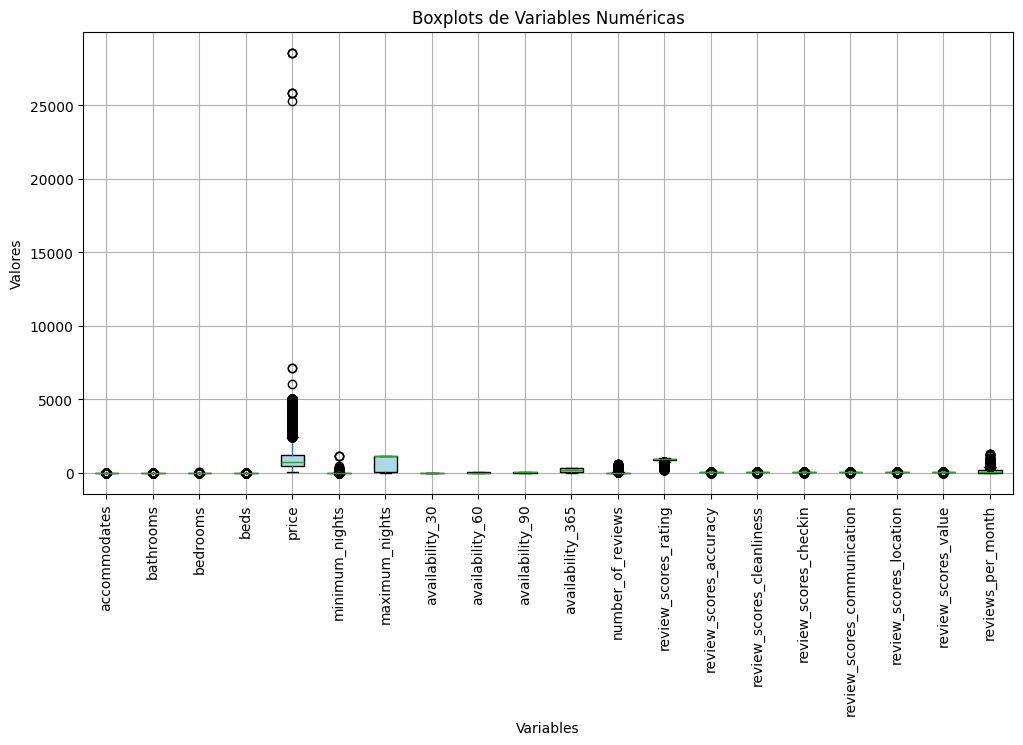

In [12]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

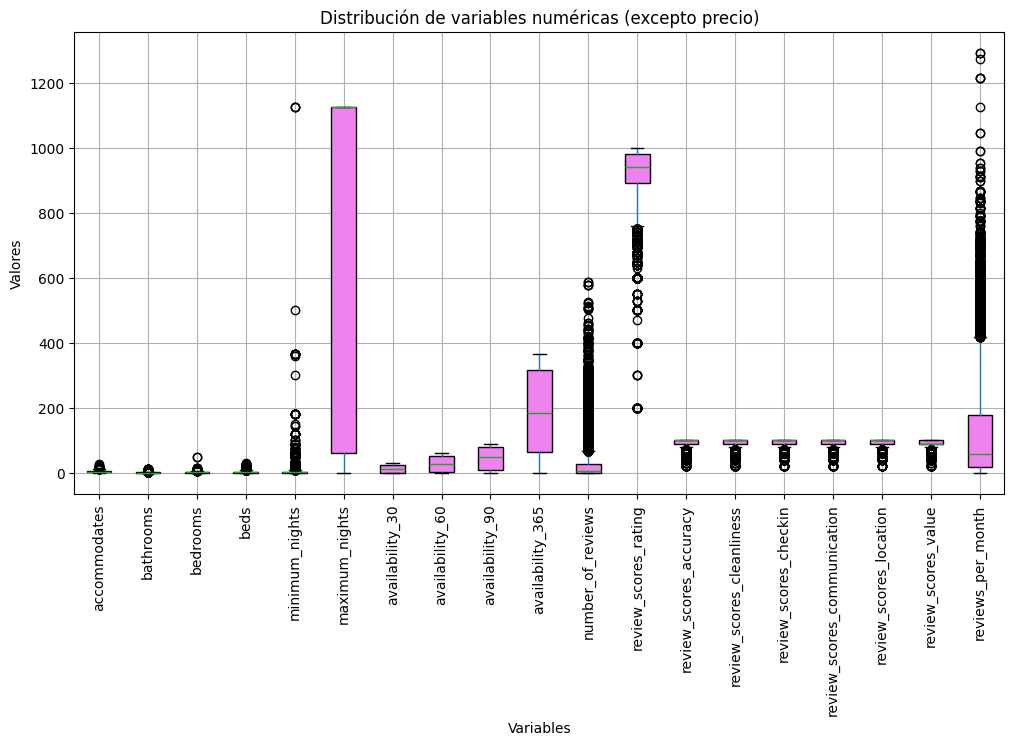

In [13]:
# nuevo gráfico sin precio para visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [14]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 21000
Total de duplicados exactos: 8000
El número de apartment_id duplicados es: 8350


In [15]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,True,7,20,40,130,78,2010-02-01,2017-05-09,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,True,0,0,0,162,33,2014-10-10,NaT,920.0,90.0,90.0,100.0,100.0,80.0,90.0,False,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,True,26,31,31,270,148,2011-05-01,NaT,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,True,9,23,49,300,292,NaT,2020-04-01,940.0,100.0,90.0,100.0,100.0,100.0,90.0,True,306.0,spain,barcelona,2020-01-10
9,73683,Sagrada Familia area for 12 people,"An ideal location for a big group, two apartme...",135703,el Camp d'en Grassot i Gr�cia Nova,Gr�cia,Entire home/apt,12,2.0,4.0,14.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Kit...",3000.0,2,60,True,8,12,23,296,120,2011-04-06,NaT,920.0,90.0,90.0,100.0,100.0,90.0,90.0,True,14.0,spain,barcelona,2018-06-09
11,79755,3Br-2bath-AC Full 5 stars reviews!,"90 m2 apartment, 2 baths, 3 bedrooms. Fully eq...",429939,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,5,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",1100.0,3,365,True,9,10,10,10,189,NaT,2016-01-10,980.0,100.0,100.0,100.0,100.0,100.0,100.0,True,234.0,spain,barcelona,2017-12-09
13,89776,Modernist flat Downtown Casa Estap� | Barcelona,"Unique and rare ! Stay in the Casa Estap�, jew...",488151,el Fort Pienc,Eixample,Entire home/apt,4,1.0,1.0,2.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Elev...",650.0,3,365,True,7,18,41,224,322,2011-10-11,2019-01-12,960.0,100.0,100.0,100.0,100.0,100.0,100.0,True,327.0,spain,barcelona,2019-12-10
14,89954,Amazing apt in the historic center,"Beautiful, new, central and cosy apartment per...",487095,Palacio,Centro,Entire home/apt,6,1.0,2.0,3.0,"TV,Cable TV,Wifi,Air conditioning,Kitchen,Elev...",1030.0,2,20,True,27,48,49,61,181,2011-01-07,2018-01-11,970.0,100.0,100.0,100.0,100.0,100.0,100.0,False,202.0,spain,madrid,2018-11-07
17,103386,"Central 2 Bedrooms, 3/5 pers. Wi-Fi","This is Edificio Palomar Apartments, I will tr...",508042,EL PILAR,CIUTAT VELLA,Entire home/apt,5,1.0,2.0,3.0,"TV,Wifi,Air conditioning,Kitchen,Paid parking ...",840.0,1,14,True,17,38,64,229,13,2011-01-11,NaT,930.0,100.0,100.0,100.0,90.0,90.0,100.0,False,13.0,spain,valencia,2019-10-31
18,107437,A beautiful villa in Barcelona,"A conserved, period villa situated in the mids...",556626,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,8,2.0,5.0,6.0,"TV,Wifi,Kitchen,Free parking on premises,Smoki...",2200.0,3,120,True,12,41,59,250,34,2011-08-07,NaT,930.0,100.0,100.0,100.0,100.0,100.0,90.0,True,38.0,spain,barcelona,2018-10-10


Se decidió borrar solo los duplicados exactos y mantener los parciales (que son duplicados de la columna apartment_id) para que cada perfil decida cómo los tratará en su análisis.

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(13000, 35)

### Valores nulos

In [18]:
df.isnull().sum()

apartment_id                      0
name                              4
description                     173
host_id                           0
neighbourhood_name                0
neighbourhood_district         5084
room_type                         0
accommodates                      0
bathrooms                       111
bedrooms                         85
beds                             60
amenities_list                   23
price                           327
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              9000
last_review_date               9000
review_scores_rating           3536
review_scores_accuracy         3549
review_scores_cleanliness      3540
review_scores_checkin          3557
review_scores_communication 

#### Eliminación de columnas irrelevantes

In [19]:
df = df.drop(columns=['description', 'country'])

#### Función de imputación de nulos

In [20]:
def imputación_desde_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo y completa sus valores faltantes 
    con los del más reciente SIN eliminar registros.
    Devuelve el df con valores actualizados y un resumen de los cambios.
    """

    df = df.copy()  # no modifica el df original
    resumen = []

    # filtra solo duplicadas por id_col
    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena (más antiguo primero)
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores faltantes en el registro antiguo
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si hubo cambios, se guarda en el resumen
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro reciente": latest_index,
                    "columnas actualizadas": actualizacion
                })

    # convierte el resumen en df
    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df, resumen_cambios = imputación_desde_duplicados(df, id_col='apartment_id', date_col='insert_date')

#### Neighbourhood_district

In [21]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [22]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [23]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [24]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

C:\Users\jodri\AppData\Local\Temp\ipykernel_22532\1815731930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["name"].fillna("Desconocido", inplace=True)


#### Verificación

In [25]:
df.isnull().sum()

apartment_id                      0
name                              0
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                    0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              8986
last_review_date               8957
review_scores_rating           3512
review_scores_accuracy         3525
review_scores_cleanliness      3516
review_scores_checkin          3533
review_scores_communication    3520
review_scores_location      

El df resultante tiene únicamente nulos en las variables relativas a las reseñas, lo cual es esperable, ya que no todos los avisos tendrán reseñas.

## Transformación de Datos (Data Transformation)

In [26]:
# Definir las columnas numéricas sobre las que calcular la media
# columnas_media = ["availability_30", "availability_60", "availability_90", "availability_365"]

# # Agrupar por 'apartment_id' y calcular la media de las columnas seleccionadas
# df_agrupado = df.groupby("apartment_id", as_index=False)[columnas_media].mean()

# # Mostrar el resultado
# # Si usas Jupyter Notebook, puedes usar display() para mejor visualización
# from IPython.display import display
# display(df_agrupado)

In [27]:
# print(df_agrupado[df_agrupado['apartment_id'] == 343864])

In [28]:
# df_agrupado.duplicated().sum()

## Reducción de Datos (Data Reduction)

## Fin de la limpieza - Dataset limpio

# Estacionalidad de la demanda - Inicio

## Limpieza y N

In [29]:
df.duplicated().sum()

registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 13000
Total de duplicados exactos: 0
El número de apartment_id duplicados es: 350


Decidimos trabajar con N = 10.000 debido a que cuantos mas datos (observaciones) tengamos mejor para responder la pregunta de negocio. No observamos una incompatibilidad al dejar mas de una observación de la misma propiedad. 

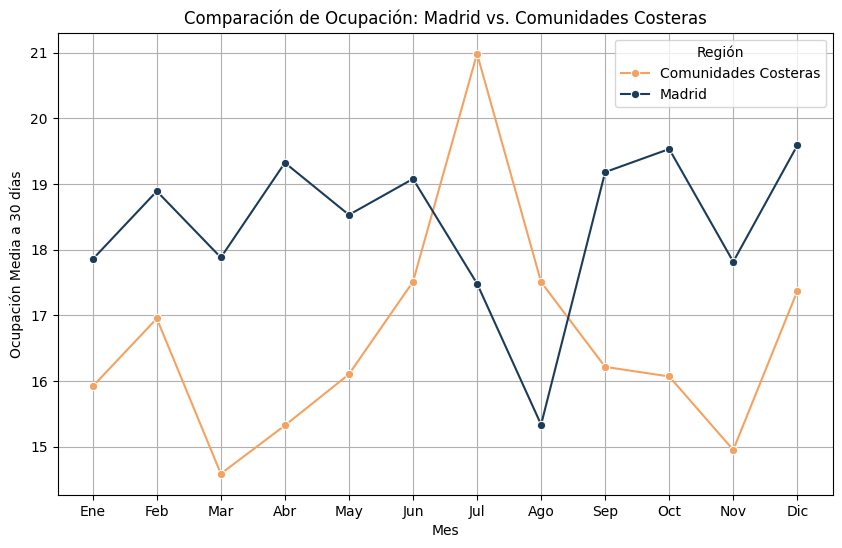

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna de fecha a tipo datetime si no lo está
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Extraer el mes para agrupar
df['month'] = df['insert_date'].dt.month

# Calcular ocupación en lugar de disponibilidad
df['occupancy'] = 30 - df['availability_30']

# Definir grupos: Madrid vs. Ciudades Costeras
df['region'] = df['city'].apply(lambda x: 'Madrid' if x == 'madrid' else 'Comunidades Costeras')

# Agrupar por región y mes
df_monthly_region = df.groupby(['region', 'month'])['occupancy'].mean().reset_index()

# Crear la visualización con un solo gráfico para ambos grupos
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_monthly_region, x='month', y='occupancy', hue='region', marker='o', palette=['#F4A261', '#1B3C59'])

# Ajustes del gráfico
plt.title("Comparación de Ocupación: Madrid vs. Comunidades Costeras")
plt.xlabel("Mes")
plt.ylabel("Ocupación Media a 30 días")
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title="Región")
plt.grid(True)
plt.show()


In [31]:
import scipy.stats as stats

# Filtrar los datos para julio (month = 7)
df_julio = df[df['month'] == 7]

# Separar los datos de ocupación en los dos grupos
ocupacion_madrid = df_julio[df_julio['region'] == 'Madrid']['occupancy']
ocupacion_costas = df_julio[df_julio['region'] == 'Comunidades Costeras']['occupancy']

# 1. Verificar normalidad en ambos grupos con Shapiro-Wilk
stat_mad, p_mad = stats.shapiro(ocupacion_madrid)
stat_costas, p_costas = stats.shapiro(ocupacion_costas)

print(f"P-value normalidad Madrid: {p_mad:.4f}")
print(f"P-value normalidad Costas: {p_costas:.4f}")

# 2. Si ambos p-valores > 0.05 usamos test t, si no, usamos Mann-Whitney U
if p_mad > 0.05 and p_costas > 0.05:
    # Test t de Student para muestras independientes
    stat, p_value = stats.ttest_ind(ocupacion_costas, ocupacion_madrid, alternative='greater')
    print(f"Test t-Student: p-value = {p_value:.4f}")
else:
    # Test de Mann-Whitney U (no paramétrico)
    stat, p_value = stats.mannwhitneyu(ocupacion_costas, ocupacion_madrid, alternative='greater')
    print(f"Test Mann-Whitney U: p-value = {p_value:.4f}")

# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: la ocupación en costas es significativamente mayor que en Madrid en julio.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que la ocupación en costas es mayor que en Madrid en julio.")


P-value normalidad Madrid: 0.0000
P-value normalidad Costas: 0.0000
Test Mann-Whitney U: p-value = 0.0012
Rechazamos la hipótesis nula: la ocupación en costas es significativamente mayor que en Madrid en julio.


## Para analizar si la **variabilidad de la ocupación a lo largo del año es mayor en las ciudades costeras que en Madrid**, podemos comparar la dispersión de los datos en cada grupo. Esto se puede hacer con un test de homogeneidad de varianzas.

Definir hipótesis

Hipótesis nula: La variabilidad de la ocupación en las ciudades costeras es igual a la de Madrid.

Hipótesis alternativa: La variabilidad de la ocupación en las ciudades costeras es mayor que la de Madrid.

Seleccionar un test adecuado

Test de Levene: Evalúa si dos grupos tienen varianzas iguales o no.

Test de Bartlett: Similar, pero asume normalidad en los datos.

Test de Fligner-Killeen: Más robusto y no requiere normalidad.

Si p < 0.05 p<0.05, rechazamos la hipotesis nula y concluimos que la variabilidad en las costas es significativamente mayor.

In [32]:
# Importar librerías
import scipy.stats as stats

# Agrupar los datos por mes
df_costeras = df[df['region'] == 'Comunidades Costeras'].groupby('month')['occupancy'].std()
df_madrid = df[df['region'] == 'Madrid'].groupby('month')['occupancy'].std()

# Aplicar test de Levene (menos estricto con normalidad)
stat, p_value = stats.levene(df_costeras, df_madrid, center='mean')

print(f"Test de Levene: p-value = {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La variabilidad de ocupación en ciudades costeras es significativamente mayor que en Madrid.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que la variabilidad de ocupación en las costas sea mayor que en Madrid.")


Test de Levene: p-value = 0.0089
Rechazamos la hipótesis nula: La variabilidad de ocupación en ciudades costeras es significativamente mayor que en Madrid.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13000 entries, 0 to 20999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 13000 non-null  int64         
 1   name                         13000 non-null  object        
 2   host_id                      13000 non-null  int64         
 3   neighbourhood_name           13000 non-null  object        
 4   neighbourhood_district       13000 non-null  object        
 5   room_type                    13000 non-null  object        
 6   accommodates                 13000 non-null  int64         
 7   bathrooms                    13000 non-null  float64       
 8   bedrooms                     13000 non-null  float64       
 9   beds                         13000 non-null  int64         
 10  amenities_list               13000 non-null  object        
 11  price                        13000 non-null  f

In [42]:
df['insert_date'].max()
#df['insert_date'].min()

Timestamp('2021-02-27 00:00:00')

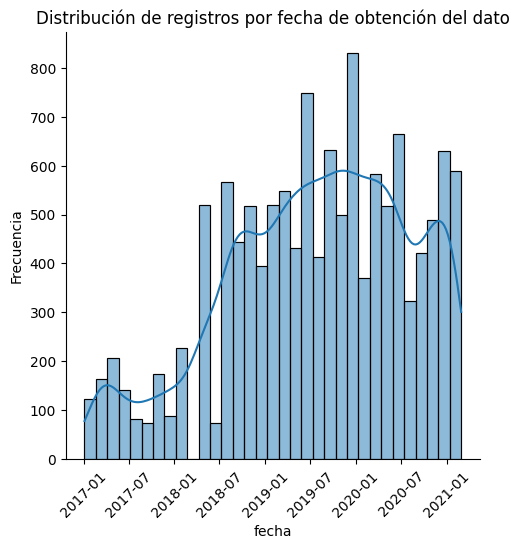

In [41]:
sns.displot( data=df["insert_date"], kde=True )

# Personalizar el gráfico
plt.xlabel("fecha")
plt.ylabel("Frecuencia")
plt.title("Distribución de registros por fecha de obtención del dato")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización

# Mostrar el gráfico
plt.show()